## Desafio Final

__Objetivo:__ 

O objetivo deste produto é fornecer um serviço automatizado que recomenda leads para um usuário dado sua atual lista de clientes (Portfólio).

__Leads__ = alguem que demonstrou interesse no segmento do negocio 

__Links__ 

- https://drive.google.com/file/d/1Nbm-e73Aa5uOOXw_7FGiU6Wh1kzOGcY1/view?usp=sharing
- https://drive.google.com/file/d/1OFkbgteIf_WqdWZgd0AEHyfYK-FoCxY6/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 12)

sns.set()

In [3]:
mercado = pd.read_csv('estaticos_market.csv', sep = ',')

In [4]:
portfolio1 = pd.read_csv("estaticos_portfolio1.csv")

In [5]:
portfolio2 = pd.read_csv("estaticos_portfolio2.csv")

In [6]:
portfolio3 = pd.read_csv("estaticos_portfolio3.csv")

### Explorando estaticos_market.csv

In [7]:
mercado.describe()

,Unnamed: 0,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
count,462298.00000,462298.000000,280.000000,176.000000,30684.000000,30684.000000,6590.000000,460371.000000,460371.000000,1760.000000,...,76261.000000,76261.000000,76261.000000,103574.000000,103574.000000,103574.000000,73888.000000,74014.000000,103574.000000,462298.000000
mean,231148.50000,9.948677,32.014286,3.818182,2.244329,1.177813,5.769044,3.591801,48.699177,134.597159,...,58.060498,96.661983,36.258851,12.324570,12.178529,14.343329,3.097607,-5.834288,9.510699,28.737044
std,133454.08171,9.615664,81.280168,6.797555,9.572536,6.589059,25.450950,72.600352,1206.696804,683.774506,...,142.951278,279.541243,123.411370,222.456579,222.584458,239.885359,163.581549,443.825819,27.918737,468.626094
min,0.00000,0.016438,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.933333,1.933333,1.933333,0.000000,0.000000,0.000000,-100.000000,-100.000000,0.000000,0.000000
25%,115574.25000,2.756164,15.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,...,25.203704,33.333333,6.966667,0.000000,0.000000,0.000000,0.000000,-44.444444,0.000000,0.000000
50%,231148.50000,6.704110,15.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,15.000000,...,43.533333,61.766667,23.200000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,346722.75000,14.465753,30.000000,4.000000,2.000000,1.000000,4.000000,0.000000,0.000000,66.250000,...,68.883333,96.266667,46.500000,5.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000
max,462297.00000,106.432877,1215.000000,50.000000,489.000000,363.000000,1017.000000,9782.000000,122090.000000,11922.000000,...,5099.066667,5099.066667,5099.066667,51547.000000,51547.000000,54205.000000,27800.000000,87300.000000,1400.000000,9647.000000


In [8]:
mercado.shape

(462298, 182)

In [9]:
mercado.dtypes

Unnamed: 0                   int64
id                          object
fl_matriz                     bool
de_natureza_juridica        object
sg_uf                       object
                            ...   
qt_funcionarios_24meses    float64
tx_crescimento_12meses     float64
tx_crescimento_24meses     float64
tx_rotatividade            float64
qt_filiais                   int64
Length: 182, dtype: object

In [10]:
mercado.head(10)

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,5,529a1f5fc6f88071db7d38492a0ce7c985c77e9b1c3bb6...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,QUIMICA-PETROQUIMICA,INDUSTRIA,38.079452,> 20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,6,8bf37c178778e537b108e58bf20552abe10c3a7fae129b...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.276712,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,7,0114fd3fbdc347c561843cde6aece12e8e53cb5d32c77d...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,SERVICOS ADMINISTRATIVOS,SERVIÇO,0.052055,<= 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,8,6c45aabb849a760a3a7107c7a61262642f683feb8912a4...,True,COOPERATIVA,AM,ENTIDADES EMPRESARIAIS,BENS DE CONSUMO,INDUSTRIA,12.263014,10 a 15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,9,2fcd678d71b04ccb77644fff57706bdc7fcfbbec6b1926...,False,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO VAREJISTA,COMERCIO,17.942466,15 a 20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [11]:
# lista de colunas 

colunas_df_mercado = list(mercado.columns)

In [12]:
#contar unicos da coluna de_ramo e setor
mercado['de_ramo'].value_counts()

COMERCIO VAREJISTA                                   172404
SERVICOS DIVERSOS                                     60318
SERVICOS DE ALOJAMENTO/ALIMENTACAO                    30180
INDUSTRIA DA CONSTRUCAO                               25363
COMERCIO E REPARACAO DE VEICULOS                      22356
SERVICOS ADMINISTRATIVOS                              21326
BENS DE CONSUMO                                       21227
SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS        17371
COMERCIO POR ATACADO                                  16464
TRANSPORTE, ARMAZENAGEM E CORREIO                     15485
SERVICOS DE EDUCACAO                                  11311
SERVICOS DE SAUDE                                      9788
CULTURA, ESPORTE E RECREACAO                           5503
SIDERURGICA-METALURGIA                                 3700
TELECOM                                                3626
PRODUTOS DE AGROPECUARIA                               3247
QUIMICA-PETROQUIMICA                    

In [55]:
mercado['setor'].value_counts()

COMERCIO            211224
SERVIÇO             189644
INDUSTRIA            30893
CONSTRUÇÃO CIVIL     25363
AGROPECUARIA          3247
Name: setor, dtype: int64

In [ ]:
#distribuicao 

In [73]:
#salvar um df com as 2 colunas
#depois fazer a reelação 

In [13]:
grupo_mercado = pd.DataFrame(mercado, columns=('setor','de_ramo'))

In [14]:
df_aux = pd.DataFrame(mercado, columns = mercado.columns)

In [15]:
df_setores_com = df_aux[df_aux['setor'] == 'COMERCIO']

In [16]:
df_setores_serv = df_aux[df_aux['setor'] == 'SERVIÇO']

In [17]:
df_setores_ind = df_aux[df_aux['setor'] == 'INDUSTRIA']

In [18]:
df_setores_cv = df_aux[df_aux['setor'] == 'CONSTRUÇÃO CIVIL']

In [19]:
df_setores_ag = df_aux[df_aux['setor'] == 'AGROPECUARIA']

In [ ]:
#montar grafico de distribuiçao de mercado

In [ ]:
#salvar  um conjuto de dados para cada setor e fazer a corerlacao

In [ ]:
#cod de correçacao
#sns.heatmap(df.corr(), annot = True)

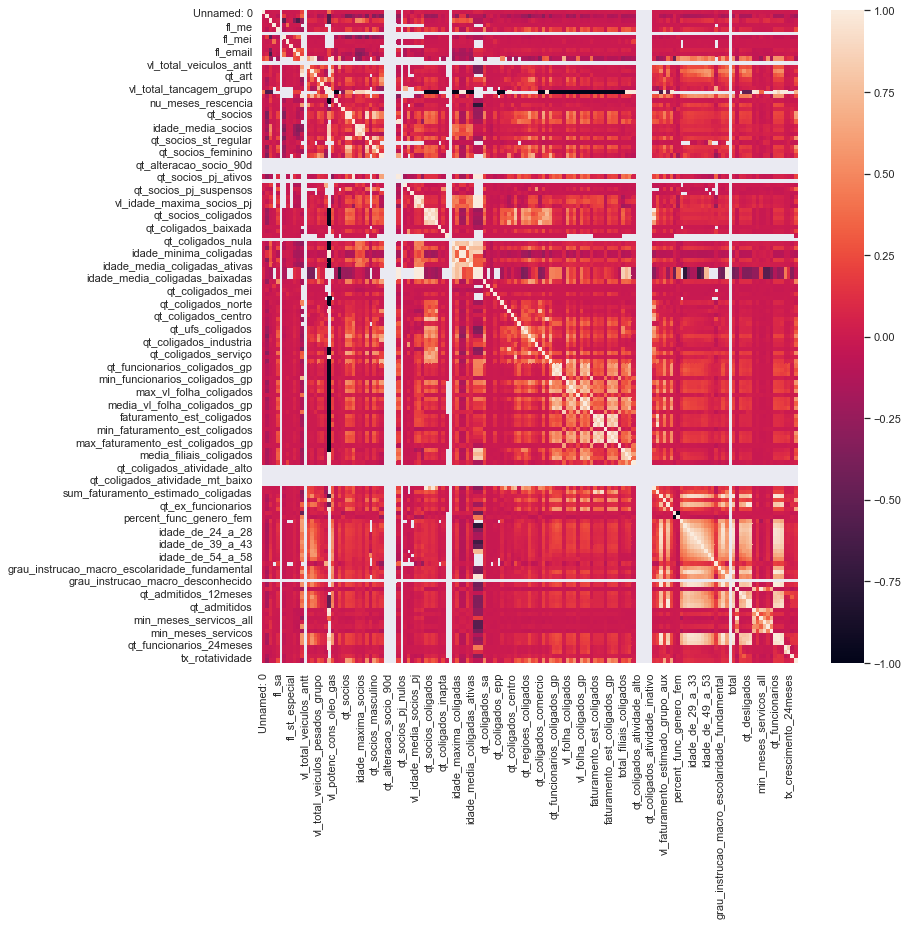

In [132]:
#SETOR: COMERCIO            
#sns.heatmap(df_setores_com.corr())

In [ ]:
#SETOR: SERVIÇO

In [ ]:
#SETOR: INDUSTRIA

In [ ]:
#SETOR: CONSTRUÇÃO CIVIL

### Verificando null dos dados de cada  segmento do mercado

In [ ]:
colunas = list(mercado.columns)

In [20]:
df_setores_com.isna().sum()

Unnamed: 0                      0
id                              0
fl_matriz                       0
de_natureza_juridica            0
sg_uf                           0
                            ...  
qt_funcionarios_24meses    159627
tx_crescimento_12meses     175236
tx_crescimento_24meses     174977
tx_rotatividade            159627
qt_filiais                      0
Length: 182, dtype: int64

In [21]:
df_setores_serv.isna().sum()

Unnamed: 0                      0
id                              0
fl_matriz                       0
de_natureza_juridica            0
sg_uf                           0
                            ...  
qt_funcionarios_24meses    152355
tx_crescimento_12meses     162090
tx_crescimento_24meses     162391
tx_rotatividade            152355
qt_filiais                      0
Length: 182, dtype: int64

In [22]:
df_setores_ind.isna().sum()

Unnamed: 0                     0
id                             0
fl_matriz                      0
de_natureza_juridica           0
sg_uf                          0
                           ...  
qt_funcionarios_24meses    23061
tx_crescimento_12meses     25095
tx_crescimento_24meses     25059
tx_rotatividade            23061
qt_filiais                     0
Length: 182, dtype: int64

In [23]:
df_setores_cv.isna().sum()

Unnamed: 0                     0
id                             0
fl_matriz                      0
de_natureza_juridica           0
sg_uf                          0
                           ...  
qt_funcionarios_24meses    19508
tx_crescimento_12meses     21581
tx_crescimento_24meses     21438
tx_rotatividade            19508
qt_filiais                     0
Length: 182, dtype: int64

In [32]:
df_setores_ag.isna().sum()

Unnamed: 0                    0
id                            0
fl_matriz                     0
de_natureza_juridica          0
sg_uf                         0
                           ... 
qt_funcionarios_24meses    2252
tx_crescimento_12meses     2483
tx_crescimento_24meses     2496
tx_rotatividade            2252
qt_filiais                    0
Length: 182, dtype: int64

### ProfileReport

In [34]:
# executando o profile
profile = ProfileReport(df_setores_ag, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [ ]:
profile

### Explorando estaticos_portfolio1.csv

In [12]:
portfolio1.head(10)

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,COMERCIO VAREJISTA,COMERCIO,0.646575,<= 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,False,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,6.586301,5 a 10,...,NaN,NaN,NaN,0.0,0.0,2.0,NaN,-100.0,0.0,4
2,2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,8.010959,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO VAREJISTA,COMERCIO,20.863014,> 20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,18.726027,15 a 20,...,39.454762,91.2,19.333333,14.0,15.0,25.0,-6.666667,-44.0,0.0,3
5,5,f7e2894dce5dbb49662da50c55bcb96cdc3d34188abfe8...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,6.238356,5 a 10,...,NaN,NaN,NaN,0.0,0.0,1.0,NaN,-100.0,0.0,0
6,6,f0c84600cbd2e126ee8314d22816368f33207e723a6ae7...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,COMERCIO VAREJISTA,COMERCIO,9.663014,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,7,d0f8bc5c0e71600d303cacebb3e8e6fd9195322b2c1b15...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO VAREJISTA,COMERCIO,0.495890,<= 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,8,b9b02480a757c3cc5054d6c01e44df62b22ea1328a8743...,True,SOCIEDADE EMPRESARIA LIMITADA,MA,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,1.161644,1 a 5,...,5.406667,5.8,3.833333,5.0,0.0,0.0,NaN,NaN,0.0,0
9,9,7d58990ba786a3a26617a8afbf814a9919ab34aa09013a...,True,SOCIEDADE EMPRESARIA LIMITADA,PI,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,5.309589,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
portfolio1['setor'].value_counts()

COMERCIO     496
INDUSTRIA     52
SERVIÇO        7
Name: setor, dtype: int64

### Explorando estaticos_portfolio2.csv

In [14]:
portfolio2.head(10)

,Unnamed: 0,id
0,0,09e95c1a84049001d086470a8f320a19b076f955a89122...
1,1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...
2,2,16843c9ffb920170477118933798510d8d5f00f5c56c12...
3,3,ff045934d90aab184dd15e66daf3b3c97193bda5449298...
4,4,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...
5,5,77ed856930ed9c2b5348eca951d152b5655c98af3bb446...
6,6,099927213e8cf60291e8241bc78a1d92da8fbb2826ae30...
7,7,d85ce0e92df9ddc051b211f1a5e3d9f223d7efd4c99245...
8,8,ccbfe46d5e42b751ffe2a742680e853f50ac12e9399c2e...
9,9,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...


In [ ]:
portfolio2.shape

### Explorando estaticos_portfolio3.csv

In [15]:
portfolio3.head(10)

,Unnamed: 0,id
0,0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...
1,1,16843c9ffb920170477118933798510d8d5f00f5c56c12...
2,2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...
3,3,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...
4,4,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...
5,5,5de08033561948a226f8ba8f8668a4ff4123be8ea7114d...
6,6,194e619cb6417f92f75653406cf04106debc5035f13a88...
7,7,cc734f72fdd8753ba2e7638f3d09e0597fd859735904da...
8,8,7e46107cb32e64f7f90ec16372d29f205f0d9781140308...
9,9,2206453fbc92af65e47ce6ee2be27fa90ac427845ea0a5...


#### Função para selecionar as variaveis mais relacionadas com setor 

__OBS: ARRUMAR A FUNCAO__

USAR PARA CADA BASE

In [ ]:
def busca_Atributos_rfe(df, quantidade):
    #df auxiliar sem NaN
    df_aux = aux.dropna()
    #df_aux = aux_com_todas_colunas_dde_teste.dropna()
    #df de treino 
    y_train = df_aux['NU_NOTA_MT']

    #df com todas as colunas sem NOTA DE MAT e o num de inscricao(PRA NAO DA BUG)
    x_train = df_aux.drop(columns = ['NU_INSCRICAO','NU_NOTA_MT'])

    #transformando x_train e y_train para array
    y = y_train.to_numpy()
    x = x_train.to_numpy()

    #agora sim implementando o RFE
    svm = LinearRegression()
    rfe = RFE(svm, 5)
    rfe = rfe.fit(x, y)

    #criando um df auxiliar para visualizar melhor o resultado
    df_aux_result = pd.DataFrame({'coluna':x_train.columns,
                  'bool': rfe.support_,
                  'ranking': rfe.ranking_})

    #filtrando o df axuliar de resultado  pelo ranking para pegar as 5 variaveis 
    variaveis = list(df_aux_result['coluna'][df_aux_result['ranking']==1])
    
    return variaveis